In [51]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, SimpleRNN, GRU, LSTM, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard


max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів

input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів

input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів

In [52]:
def create_plot(history):
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
    plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
    plt.title('Точність тренування і валідації')  # Заголовок графіку
    plt.legend()  # Показати легенду

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
    plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
    plt.title('Втрати тренування і валідації')  # Заголовок графіку
    plt.legend()  # Показати легенду

    plt.show()  # Відобразити графіки


In [53]:
def make_predictions(model):
    
    predictions = model.predict(input_test)

    # Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
    binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

    # Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
    for i in range(10):
        print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

    # Додатковий крок: Оцінка моделі
    # Це дасть загальну точність моделі на тестових даних
    test_loss, test_acc = model.evaluate(input_test, y_test)
    print('Test Loss: {}'.format(test_loss))
    print('Test Accuracy: {}'.format(test_acc))

# RNN

Epoch 1/10
68/69 [============================>.] - ETA: 0s - loss: 0.6675 - acc: 0.5912
Epoch 1: val_acc improved from -inf to 0.76893, saving model to best_model_rnn.keras
69/69 [==============================] - 5s 63ms/step - loss: 0.6668 - acc: 0.5927 - val_loss: 0.5458 - val_acc: 0.7689
Epoch 2/10
68/69 [============================>.] - ETA: 0s - loss: 0.4803 - acc: 0.7964
Epoch 2: val_acc improved from 0.76893 to 0.82333, saving model to best_model_rnn.keras
69/69 [==============================] - 4s 63ms/step - loss: 0.4798 - acc: 0.7966 - val_loss: 0.4226 - val_acc: 0.8233
Epoch 3/10
68/69 [============================>.] - ETA: 0s - loss: 0.3484 - acc: 0.8585
Epoch 3: val_acc improved from 0.82333 to 0.83280, saving model to best_model_rnn.keras
69/69 [==============================] - 4s 63ms/step - loss: 0.3481 - acc: 0.8586 - val_loss: 0.3903 - val_acc: 0.8328
Epoch 4/10
68/69 [============================>.] - ETA: 0s - loss: 0.2743 - acc: 0.8931
Epoch 4: val_acc improv

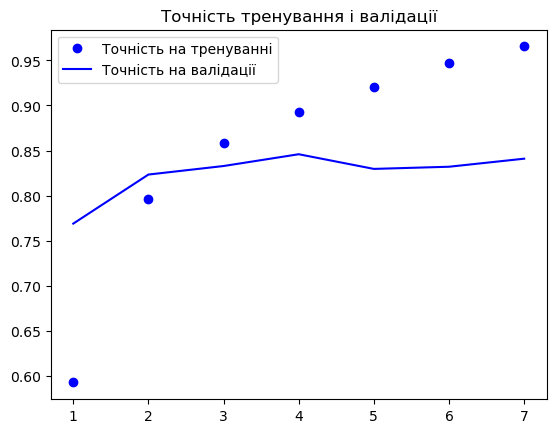

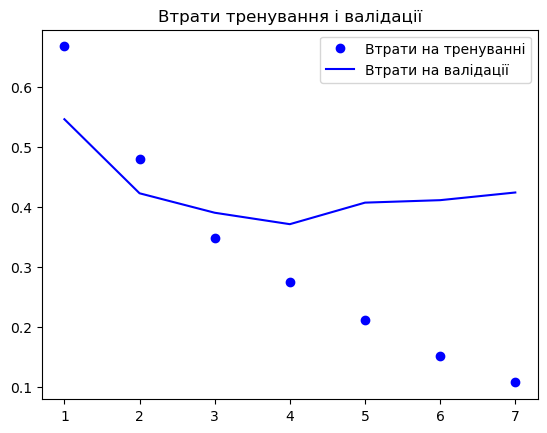

782/782 [==============================] - 4s 5ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 4s 5ms/step - loss: 0.4329 - acc: 0.8351
Test Loss: 0.4329167604446411
Test Accuracy: 0.8350800275802612


In [59]:
model = Sequential()

model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

early_stopping = EarlyStopping(patience=3, monitor='val_acc')
checkpoint = ModelCheckpoint('best_model_rnn.keras', monitor='val_acc', mode='max', save_best_only=True, verbose=1)

history = model.fit(input_train, y_train, epochs=10, batch_size=256, validation_split=0.3, callbacks=[checkpoint, early_stopping])

create_plot(history)
make_predictions(model)


# LSTM

Epoch 1/15
35/35 [==============================] - ETA: 0s - loss: 0.6498 - acc: 0.6610
Epoch 1: val_acc improved from -inf to 0.76960, saving model to best_model_lstm.keras
35/35 [==============================] - 16s 430ms/step - loss: 0.6498 - acc: 0.6610 - val_loss: 0.5348 - val_acc: 0.7696
Epoch 2/15
35/35 [==============================] - ETA: 0s - loss: 0.4722 - acc: 0.8163
Epoch 2: val_acc improved from 0.76960 to 0.82293, saving model to best_model_lstm.keras
35/35 [==============================] - 15s 437ms/step - loss: 0.4722 - acc: 0.8163 - val_loss: 0.4225 - val_acc: 0.8229
Epoch 3/15
35/35 [==============================] - ETA: 0s - loss: 0.3657 - acc: 0.8642
Epoch 3: val_acc improved from 0.82293 to 0.85347, saving model to best_model_lstm.keras
35/35 [==============================] - 15s 430ms/step - loss: 0.3657 - acc: 0.8642 - val_loss: 0.3612 - val_acc: 0.8535
Epoch 4/15
35/35 [==============================] - ETA: 0s - loss: 0.2997 - acc: 0.8895
Epoch 4: val_a

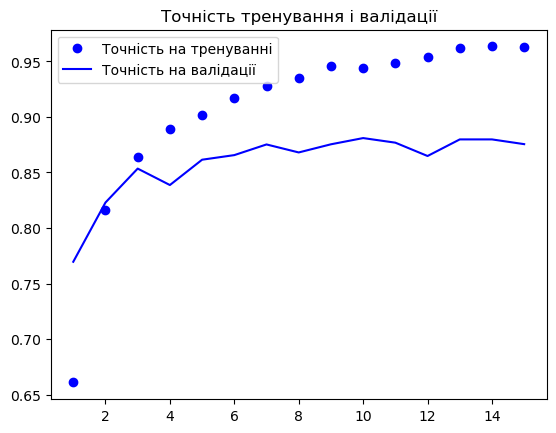

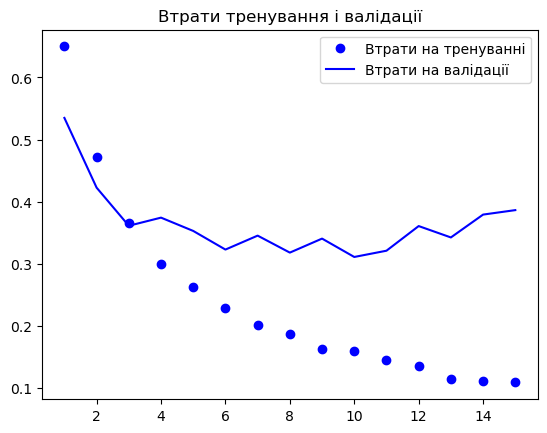

782/782 [==============================] - 10s 12ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 9s 12ms/step - loss: 0.4330 - acc: 0.8615
Test Loss: 0.43296903371810913
Test Accuracy: 0.861519992351532


In [58]:
model = Sequential()

model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

early_stopping = EarlyStopping(patience=5, monitor='val_acc')
checkpoint = ModelCheckpoint('best_model_lstm.keras', monitor='val_acc', mode='max', save_best_only=True, verbose=1)

history = model.fit(input_train, y_train, epochs=15, batch_size=512, validation_split=0.3, callbacks=[checkpoint, early_stopping])

create_plot(history)
make_predictions(model)

# Bidirectional

Epoch 1/10
35/35 [==============================] - ETA: 0s - loss: 0.6486 - acc: 0.6437
Epoch 1: val_acc improved from -inf to 0.79400, saving model to best_model_bd.keras
35/35 [==============================] - 19s 510ms/step - loss: 0.6486 - acc: 0.6437 - val_loss: 0.5084 - val_acc: 0.7940
Epoch 2/10
35/35 [==============================] - ETA: 0s - loss: 0.4695 - acc: 0.8127
Epoch 2: val_acc improved from 0.79400 to 0.79867, saving model to best_model_bd.keras
35/35 [==============================] - 17s 495ms/step - loss: 0.4695 - acc: 0.8127 - val_loss: 0.4307 - val_acc: 0.7987
Epoch 3/10
35/35 [==============================] - ETA: 0s - loss: 0.3745 - acc: 0.8529
Epoch 3: val_acc improved from 0.79867 to 0.80373, saving model to best_model_bd.keras
35/35 [==============================] - 18s 516ms/step - loss: 0.3745 - acc: 0.8529 - val_loss: 0.4401 - val_acc: 0.8037
Epoch 4/10
35/35 [==============================] - ETA: 0s - loss: 0.3001 - acc: 0.8891
Epoch 4: val_acc imp

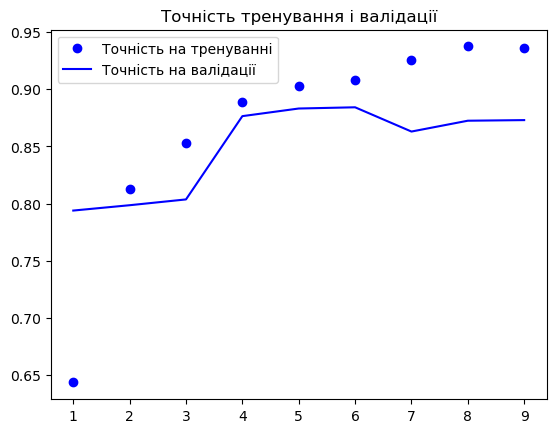

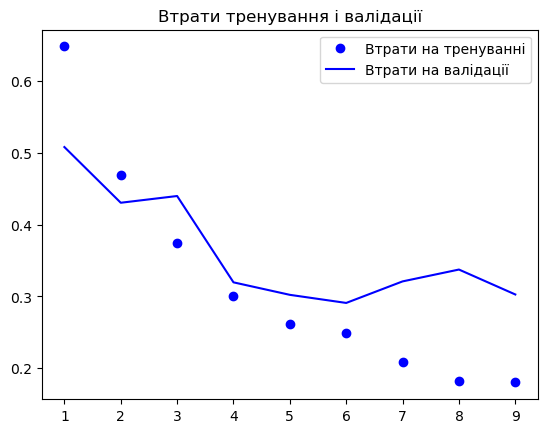

782/782 [==============================] - 11s 13ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 10s 13ms/step - loss: 0.3191 - acc: 0.8641
Test Loss: 0.31913426518440247
Test Accuracy: 0.864080011844635


In [62]:
model = Sequential()

model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

early_stopping = EarlyStopping(patience=3, monitor='val_acc')
checkpoint = ModelCheckpoint('best_model_bd.keras', monitor='val_acc', mode='max', save_best_only=True, verbose=1)

history = model.fit(input_train, y_train, epochs=10, batch_size=512, validation_split=0.3, callbacks=[checkpoint, early_stopping])

create_plot(history)
make_predictions(model)

# Deep BRNN

Epoch 1/10
35/35 [==============================] - ETA: 0s - loss: 0.6017 - acc: 0.6721
Epoch 1: val_acc improved from -inf to 0.80040, saving model to best_model_deep_bd.keras
35/35 [==============================] - 43s 1s/step - loss: 0.6017 - acc: 0.6721 - val_loss: 0.4735 - val_acc: 0.8004
Epoch 2/10
35/35 [==============================] - ETA: 0s - loss: 0.3902 - acc: 0.8439
Epoch 2: val_acc improved from 0.80040 to 0.83093, saving model to best_model_deep_bd.keras
35/35 [==============================] - 41s 1s/step - loss: 0.3902 - acc: 0.8439 - val_loss: 0.3803 - val_acc: 0.8309
Epoch 3/10
35/35 [==============================] - ETA: 0s - loss: 0.3160 - acc: 0.8745
Epoch 3: val_acc improved from 0.83093 to 0.86773, saving model to best_model_deep_bd.keras
35/35 [==============================] - 41s 1s/step - loss: 0.3160 - acc: 0.8745 - val_loss: 0.3218 - val_acc: 0.8677
Epoch 4/10
35/35 [==============================] - ETA: 0s - loss: 0.2702 - acc: 0.8939
Epoch 4: val_a

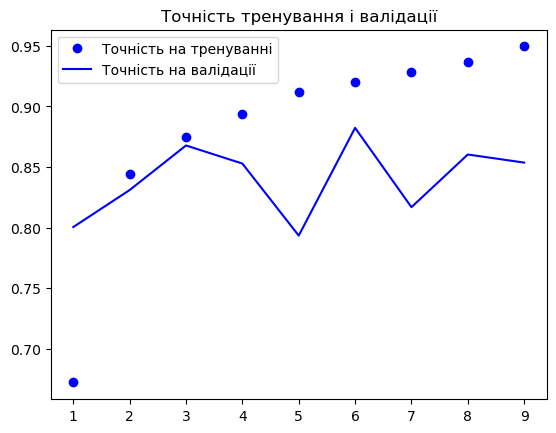

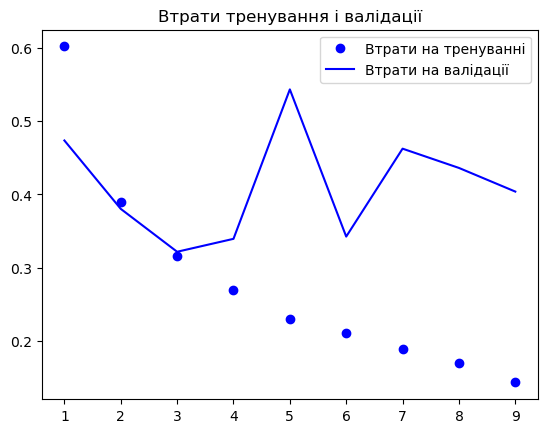

782/782 [==============================] - 23s 29ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 23s 29ms/step - loss: 0.4191 - acc: 0.8486
Test Loss: 0.4190828800201416
Test Accuracy: 0.8485599756240845


In [63]:
model = Sequential()

model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

early_stopping = EarlyStopping(patience=3, monitor='val_acc')
checkpoint = ModelCheckpoint('best_model_deep_bd.keras', monitor='val_acc', mode='max', save_best_only=True, verbose=1)

history = model.fit(input_train, y_train, epochs=10, batch_size=512, validation_split=0.3, callbacks=[checkpoint, early_stopping])

create_plot(history)
make_predictions(model)

#### Усі моделі мають приблизно однакову точність, але для цих даних найбільш точніше себе показала модель Bidirectional з точністю 0.864.